
# Project: The Movies Data Base

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project, we are going to invistigate TMDB (The Movies Data Base), The reason I picked this data for is that I love cinema and I'm a big fan of alot of movies, actors and directors, I'm always fond of tracking all news about movies and actors,
So, this data set would be great for feeding my interests, I want to know alot about this data set and I have alot of questions about it, which I will try to answer using by analysing thisdata set, and these questions are:

  Q1: How is the growth of the revenue of movies over years?
  
  Q2: Which movie genres are the most popular and has the most revenue overtime?
 
  Q3: Who are the most popular directors from 2010 : 2015?
 
  Q4: Does the popularity affect the number of votes or not ?
 
  Q5: is the vote count increased over years or not ?
 
  Q6: Who is the actor that acted in the highest number of movies in this data set?
  
  Q7: What are the movie details that have tha highest and lowest vote average?


### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
##getting the number of rows & columns
df.shape

(10866, 21)

In [4]:
##getting some information about data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Checking for duplicates 

In [5]:
sum(df.duplicated())


1

#### Removing duplicates

In [6]:
##drop duplicated rows (we have 1)
df.drop_duplicates(inplace=True)
##Check for removing dup.
sum(df.duplicated())

0


### Data Cleaning (Removing undesired columns, )

In [7]:
##remove the columns ['homepage', 'tagline', 'keywords' , 'overview','imdb_id'] as they have alot of null values
##and I'm not interested in them on answering my questions
df.drop(columns= ['homepage', 'tagline', 'keywords' , 'overview','imdb_id'], inplace=True)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

In [9]:
##now we want the genre on making our conclusion, so we would drop the rows that has null genres
df = df[pd.notnull(df['genres'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   popularity            10842 non-null  float64
 2   budget                10842 non-null  int64  
 3   revenue               10842 non-null  int64  
 4   original_title        10842 non-null  object 
 5   cast                  10767 non-null  object 
 6   director              10800 non-null  object 
 7   runtime               10842 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9826 non-null   object 
 10  release_date          10842 non-null  object 
 11  vote_count            10842 non-null  int64  
 12  vote_average          10842 non-null  float64
 13  release_year          10842 non-null  int64  
 14  budget_adj            10842 non-null  float64
 15  revenue_adj        

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### From the description of ['revenue', 'budget', 'budget_adj', 'revenue_adj','runtime'] it seems that there are alot of zeroes values .. let's check that

In [11]:
##first for revenue: 
df[df['revenue']==0].shape

(5993, 16)

In [12]:
## as I expected, it has a lot of zeroes so let's fix it by replacing it with null values
df['revenue'].replace(to_replace =0, 
                     value =np.nan,inplace=True) 
## notice that I didn't want to replace it with the average as it will affect tha variation badly

In [13]:
##check for zeroes
df[df['revenue']==0].shape

(0, 16)

#### Now , let's repeat the previous steps to the remaining columns

In [14]:
df[df['budget']==0].shape

(5674, 16)

In [15]:
df['budget'].replace(to_replace =0, 
                     value =np.nan,inplace=True) 

In [16]:
df[df['budget_adj']==0].shape

(5674, 16)

In [17]:
df['budget_adj'].replace(to_replace =0 ,
                     value =np.nan,inplace=True) 

In [18]:
df[df['revenue_adj']==0].shape

(5993, 16)

In [19]:
df['revenue_adj'].replace(to_replace =0 ,
                     value =np.nan,inplace=True) 

In [20]:
df[df['runtime']==0].shape

(30, 16)

#### notice that there aren't many of runtime values that equal to zero, so I just drop them

In [21]:
df = df[df['runtime']>0]

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10812.000000,10812.000000,5.165000e+03,4.849000e+03,10812.000000,10812.000000,10812.000000,10812.000000,5.165000e+03,4.849000e+03
mean,65558.945523,0.648730,3.076120e+07,8.923886e+07,102.421846,218.369404,5.975379,2001.288938,3.691521e+07,1.151009e+08
std,91662.645876,1.001976,3.891166e+07,1.620801e+08,30.871363,576.886018,0.934122,12.819746,4.196662e+07,1.988557e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10576.750000,0.209045,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.108664e+06,1.046585e+07
50%,20500.500000,0.385298,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.274082e+07,4.395666e+07
75%,74725.250000,0.716608,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Till now it seems good except for outliers in run time

In [23]:
df[df['runtime']>400].shape

(12, 16)

In [24]:
## not many, so I'll drop it
df = df[df['runtime']<=400]

In [25]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,5.164000e+03,4.848000e+03,10800.000000,10800.000000,10800.000000,10800.000000,5.164000e+03,4.848000e+03
mean,65454.084074,0.649164,3.074392e+07,8.923148e+07,101.886759,218.539259,5.973824,2001.287130,3.689912e+07,1.150929e+08
std,91594.624722,1.002419,3.889561e+07,1.620961e+08,25.877568,577.176679,0.933059,12.823434,4.195475e+07,1.988754e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10570.500000,0.209112,6.000000e+06,7.724244e+06,90.000000,17.000000,5.400000,1995.000000,8.107071e+06,1.046477e+07
50%,20460.000000,0.385360,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.273559e+07,4.392749e+07
75%,74519.250000,0.716915,4.000000e+07,9.982320e+07,111.000000,146.250000,6.600000,2011.000000,5.008384e+07,1.313967e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,400.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now after I've cleaned my data, Let's move on to exploration.

### Q1: How is the growth of the revenue of movies over years?

In [26]:
##changing style of the plot
plt.style.use('seaborn-darkgrid')

In [27]:
##now, let's make a list with the total revenue_avg in every year
arr=df['release_year'].unique()
sort_year=np.sort(arr)

In [28]:
mean_rev=[]
for year in sort_year:
    mean_rev.append(df[df['release_year']==year].revenue.mean())    

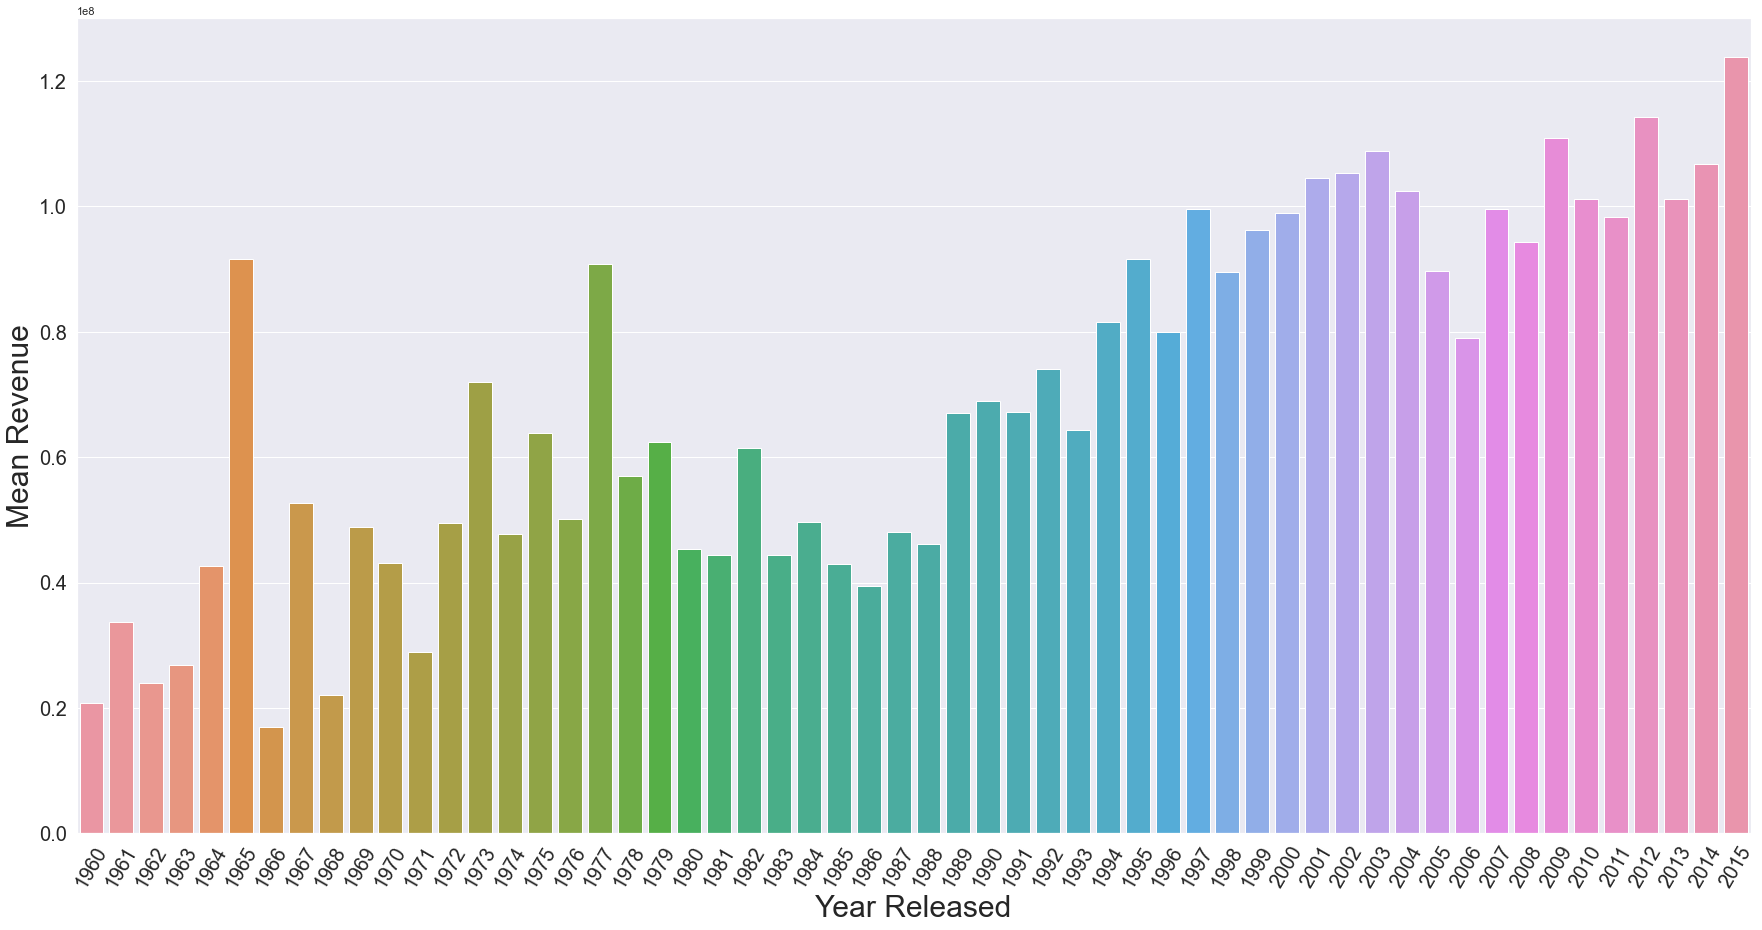

In [29]:
sns.set(palette=sns.color_palette("Set2"));
## make a new data frame or a serie to explore and plot it 
year_rel = pd.DataFrame({'year':sort_year ,
                   'mean_rev': mean_rev})
##year_rel.plot.bar(x='year', y='mean_rev',figsize=(15,10),color="purple",);
fig, ax = plt.subplots(figsize = (30,15))
sns.barplot(x=year_rel['year'], y=year_rel['mean_rev'],ax=ax);
plt.xticks(rotation = 60,fontsize=20)
plt.yticks(fontsize=20);
plt.xlabel('Year Released',fontsize=30)
plt.ylabel('Mean Revenue',fontsize=30);

#### it's obvious that  2009-2015 have the highest revenue 

### -------------------------------------------------------------------------------

### Q2: Which genres are the most popular and has the most revenue overtime?

In [30]:
#function which will split the values with '|' and return the count of each slitted string like the genres or cast 
def splitting(df_column):
    #will take a column, and separate the string by '|'
    splitted =df_column.str.cat(sep = '|')
    #make a pandas series and storing the values separately
    splitted = pd.Series(splitted.split('|'))
    #arranging in descending order
    values = splitted.value_counts(ascending = False)
    
    return values


In [31]:
splitted=splitting(df['genres'])
all_genres=splitted.index.values
all_genres

array(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy',
       'Mystery', 'Animation', 'Documentary', 'Music', 'History', 'War',
       'Foreign', 'Western', 'TV Movie'], dtype=object)

In [32]:
##calculating the mean revenue for each genre, also the popularity pear genre
mean_rev_per_genre=[]
popu_per_genre=[]
for genre in all_genres:
    mean_rev_per_genre.append(df[df['genres'].str.contains(genre)].revenue.mean())
    popu_per_genre.append(df[df['genres'].str.contains(genre)].popularity.mean())

In [33]:
genre_rev = pd.DataFrame({'genre':all_genres ,
                   'revenue': mean_rev_per_genre})

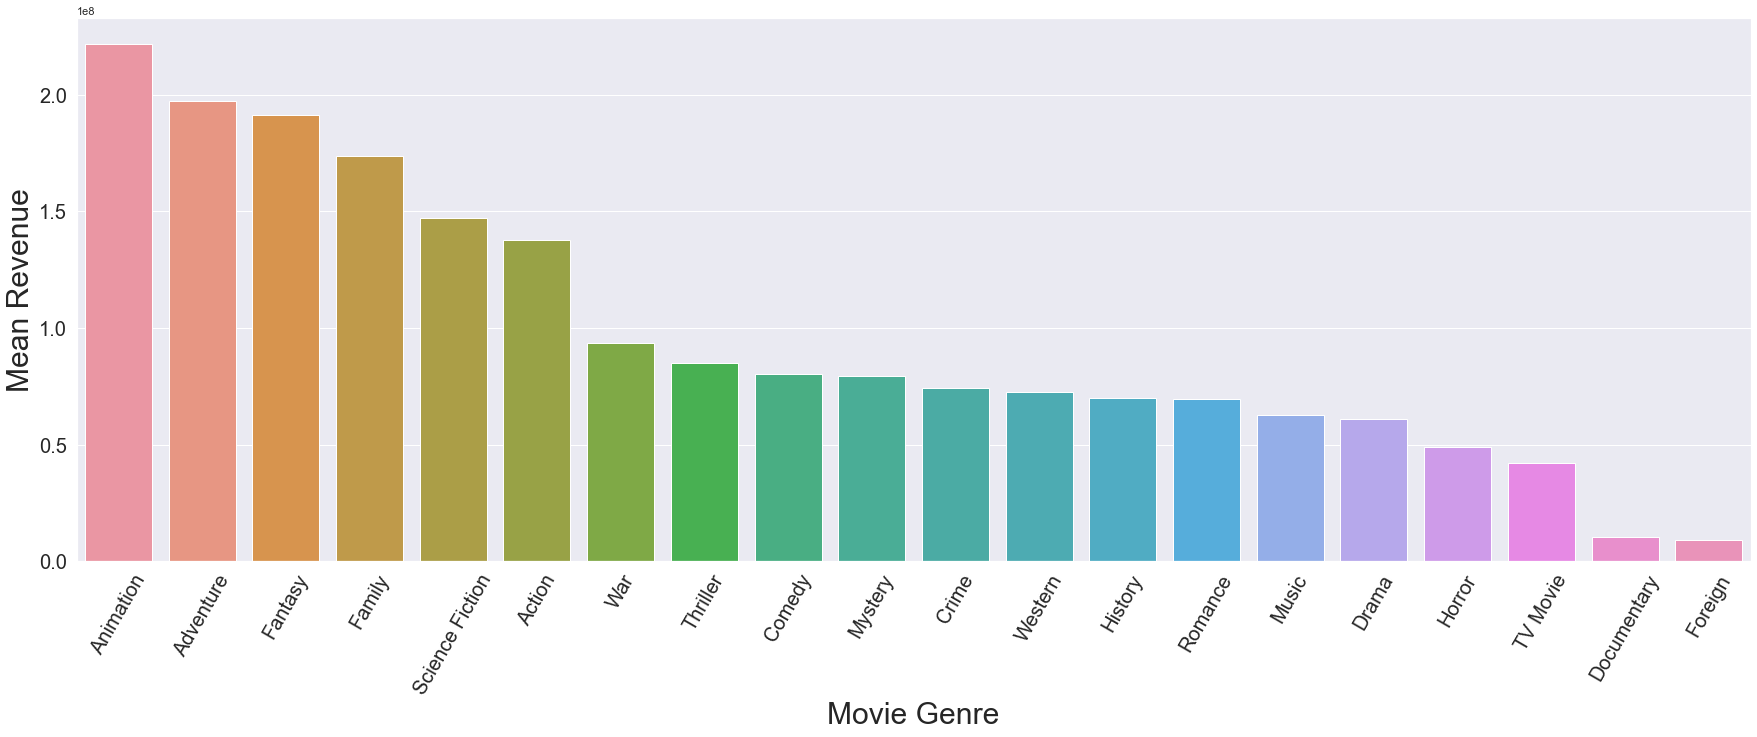

In [34]:
##genre_rev.sort_values('revenue',ascending=False).plot.bar(x='genre', y='revenue',figsize=(30,15),color="#EE6666",fontsize=20);
genre_rev.sort_values('revenue',ascending=False,inplace=True)
fig, ax = plt.subplots(figsize = (30,10))
sns.barplot(x=genre_rev['genre'], y=genre_rev['revenue'],ax=ax);
plt.xticks(rotation = 60,fontsize=20)
plt.yticks(fontsize=20);
plt.xlabel('Movie Genre',fontsize=30)
plt.ylabel('Mean Revenue',fontsize=30);

#### It seems that Animation movies has the most revenue over years then advanture movies and then Fantacy

### -------------------------------------------------------------------------------

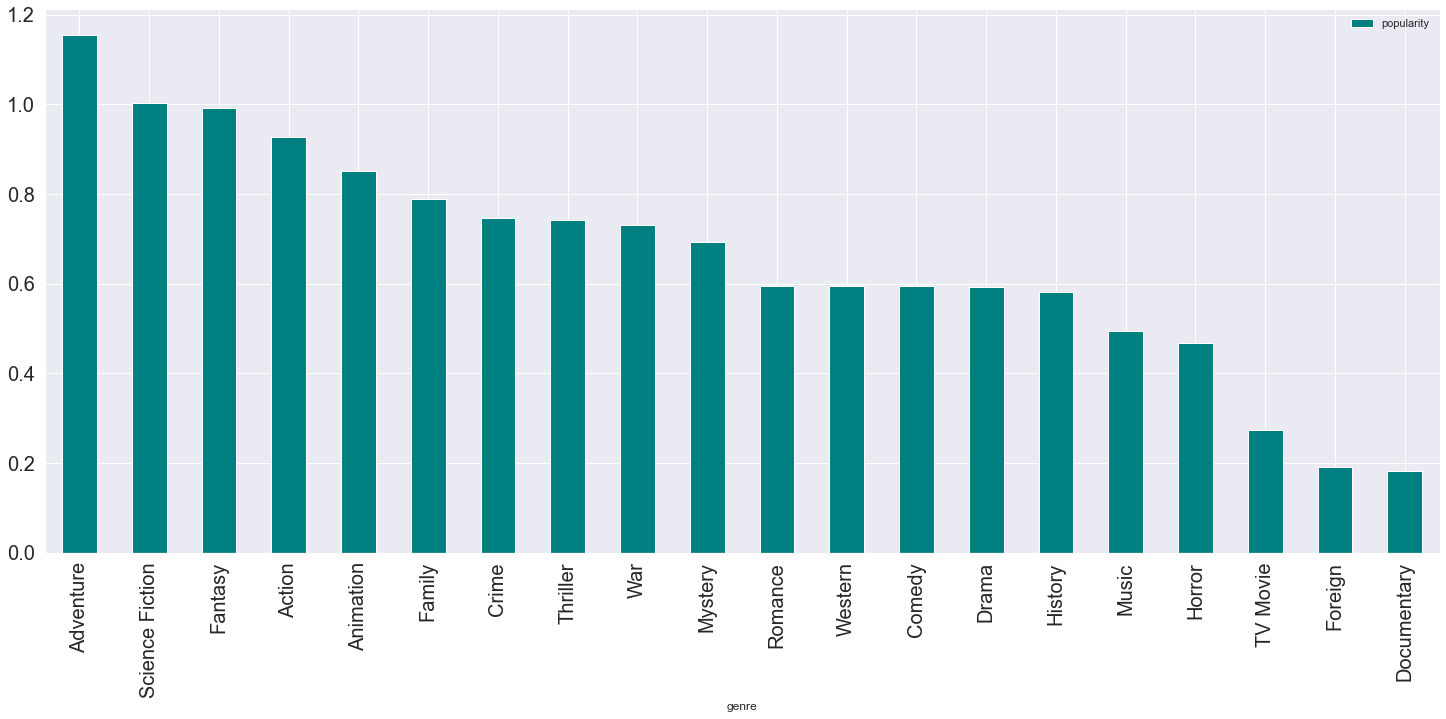

In [35]:
genre_pop= pd.DataFrame({'genre':all_genres ,
                   'popularity': popu_per_genre})
genre_pop.sort_values('popularity',ascending=False).plot.bar(x='genre', y='popularity',figsize=(25,10),color="#008080",fontsize=20);

#### It also seems that Adveture movies are the most popular over years then science fiction movies
#### and then fantacy, the least one is documentary


### -------------------------------------------------------------------------------

### Q3: who are the most popular directors from 2010 : 2015?

In [36]:
df_new=df[df['release_year']>=2010].copy()
df_new.dropna(subset=['director'],inplace=True)
splitted=splitting(df_new['director'])
directors=splitted.index.values
popular_director=[]
for direct in directors:
    popular_director.append(df_new[df_new['director'].str.contains(direct)].popularity.mean())
  

In [37]:
popular_directors = pd.DataFrame({'director':directors , 'popularity': popular_director})

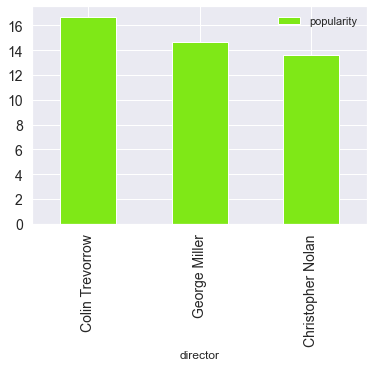

In [38]:
popular_directors.nlargest(3, 'popularity').sort_values('popularity',ascending=False).plot.bar(x='director', y='popularity',color='#7FE817',fontsize=14);

#### So Colin Trevorrow, George Miller, Christopher Nolan had the most popular films during this period

### -------------------------------------------------------------------------------

### Q4: Is popularity affects the number of votes or not ?

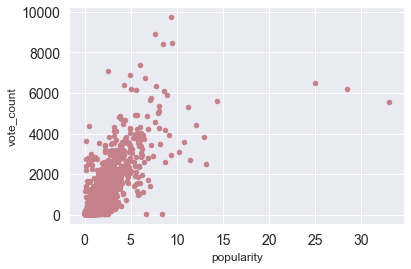

In [39]:
df.plot.scatter(x='popularity',y='vote_count',color='#C48189',fontsize=14);

#### - From the graph shown, there is a positive correlation between popularity of a movie and the number of votes for it,
#### so, the answer would be yes it increases by the increasement of the popularity
  
  
### -------------------------------------------------------------------------------

### Q5: is the vote count increased over years or not ?

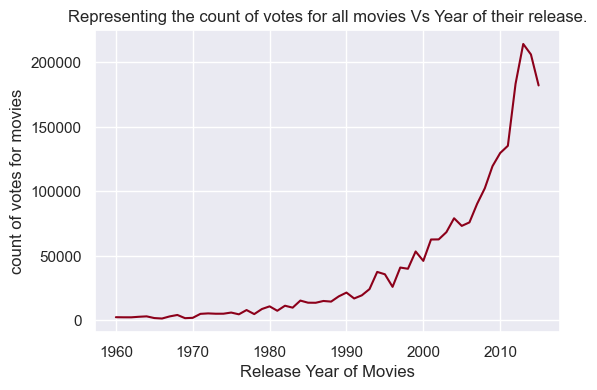

In [40]:
#we want to know the vote_count of movies for every year therefore we have to sum up all the movies of a particular year

vote_year = df.groupby('release_year')['vote_count'].sum()

#figure size(width, height)
plt.figure(dpi =100)

#x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#y-axis
plt.ylabel('count of votes for movies', fontsize = 12)
#title
plt.title('Representing the count of votes for all movies Vs Year of their release.')

#plotting the graph
plt.plot(vote_year,color='#8C001A')

#displaying the line plot
plt.show()

#### - so, from the graph shown it seems that number of vote counts for movies is increased yearly and is maximized in 2010-2013

### -------------------------------------------------------------------------------

### Q6: Who is the actor that acted in the highest number of movies in this data set

In [41]:
splitted=splitting(df['cast'])
all_genres=[splitted.idxmax(), splitted.max()]
all_genres

['Robert De Niro', 72]

#### It seems that " Robert De Niro" acted in most of the movies

### -------------------------------------------------------------------------------

#### Q7: What are the movie details that have tha highest and lowest vote average?

In [42]:
### let's start with the highest
##getting the id of the movie with highest vote average
highest=df['vote_average'].idxmax()
highest=df.loc[highest].dropna()
highest

id                                224972
popularity                      0.114264
original_title      The Mask You Live In
director          Jennifer Siebel Newsom
runtime                               88
genres                       Documentary
release_date                      1/1/15
vote_count                            11
vote_average                         8.9
release_year                        2015
Name: 538, dtype: object

In [43]:
### Doing the same steps with the lowest
##getting the id of the movie with lowest vote average
lowest=df['vote_average'].idxmin()
lowest=df.loc[lowest].dropna()
lowest

id                                                                  25055
popularity                                                        0.12112
original_title                                              Transmorphers
cast                    Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director                                                      Leigh Scott
runtime                                                                86
genres                                   Action|Adventure|Science Fiction
production_companies                                          Asylum, The
release_date                                                      6/26/07
vote_count                                                             10
vote_average                                                          1.5
release_year                                                         2007
Name: 7772, dtype: object

<a id='conclusions'></a>
## Conclusions

 So, After taking a look at the dataset at first, knowing the fields of it, then cleaning it by removing null values, duplicates, fixing zeores, and dropping undesired columns, I started to try answering the questions I asked in the beginning
 
 Here are the conclusions and answers to my questions:
 
 1: It seems the revenue is incresed as the years go by, it's obvious that  2009-2015 have the highest revenue .
 
 2: a.For revenue, It seems that Animation movies has the most revenue over years then advanture movies and then Fantacy.
 
   b.For popularity, It also seems that Adveture movies are the most popular over years then science fiction movie and then fantacy, the least one is documentary
    
 3: Colin Trevorrow, George Miller, Christopher Nolan had the most popular films during this period, so, if I want to make a recommendation to someone who wants to watch a good recent movie, it will be good if I recommended afilm directed by one these actors to him.
 
 4: From the graph shown, there is a positive correlation between popularity of a movie and the number of votes for it,
   so, the answer would be yes it increases by the increasement of the popularity
   
 5: From the graph shown it seems that number of vote counts for movies is increased yearly and is maximized in 2010-2013
 
 6: It seems that " Robert De Niro" acted in most of the movies, I suggest that he is a hard working actor
 
 7:" The Mask You Live" *a Documentary film* directed by *Jennifer Siebel Newsom* has the highest vote average
 
   while Transmorphers *an Action|Adventure|Science Fiction movie* directed by *Leigh Scott* has the lowest vote average


   Now I can use these information to make my own decision, and insights


<a id='resources'></a>
## Resources

https://pandas.pydata.org/docs/
https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column
https://stackoverflow.com/questions/59009359/how-can-i-get-unique-words-from-a-dataframe-column-of-strings
https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0